In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/link2/carprices.csv")

In [3]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [5]:
df.value_counts()

Car Model              Mileage  Sell Price($)  Age(yrs)
Audi A5                52000    32000          5           1
                       59000    29400          5           1
                       72000    19300          6           1
                       91000    12000          8           1
BMW X5                 22500    40000          2           1
                       35000    34000          3           1
                       46000    31500          4           1
                       57000    26100          5           1
                       69000    18000          6           1
Mercedez Benz C class  59000    33000          5           1
                       67000    22000          6           1
                       79000    21000          7           1
                       83000    20000          7           1
dtype: int64

In [6]:
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

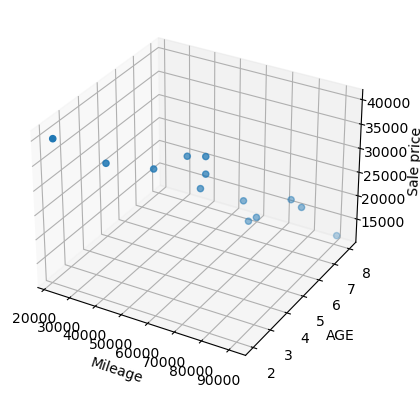

In [7]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(df['Mileage'],df['Age(yrs)'],df['Sell Price($)'])
plt.xlabel("Mileage")
plt.ylabel("AGE")
ax.set_zlabel("Sale price")
plt.show()
# sns.scatter3d(data = df,x = "Mileage",y = "Age(yrs)",z = "Sell Price($)")

[Text(0, 0, '22500'),
 Text(1, 0, '35000'),
 Text(2, 0, '46000'),
 Text(3, 0, '52000'),
 Text(4, 0, '57000'),
 Text(5, 0, '59000'),
 Text(6, 0, '67000'),
 Text(7, 0, '69000'),
 Text(8, 0, '72000'),
 Text(9, 0, '79000'),
 Text(10, 0, '83000'),
 Text(11, 0, '91000')]

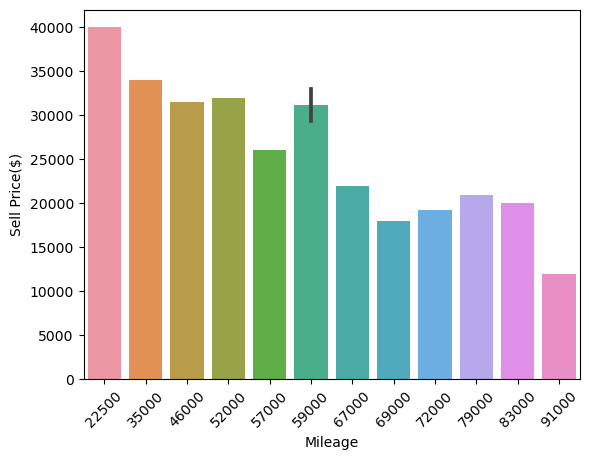

In [8]:
plot = sns.barplot(data = df,x = "Mileage",y = "Sell Price($)")#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

[Text(0, 0, '2'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '7'),
 Text(6, 0, '8')]

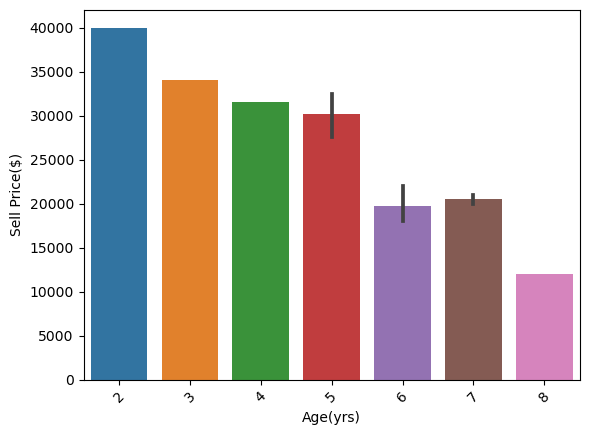

In [9]:
plot = sns.barplot(data = df,x = "Age(yrs)",y = "Sell Price($)")#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

In [10]:
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lb = q1 - (1.5*iqr)
ub = q3 + (1.5*iqr)
print(lb,ub)

Mileage          22000.0
Sell Price($)     2000.0
Age(yrs)             3.5
dtype: float64 Mileage          102000.0
Sell Price($)     50000.0
Age(yrs)              7.5
dtype: float64


C:\Users\joben\AppData\Local\Temp\ipykernel_2472\2542816970.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\joben\AppData\Local\Temp\ipykernel_2472\2542816970.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


In [12]:
df1 = df.iloc[:,0]

In [13]:
df = df[(df>lb) & (df<ub)].drop(['Car Model'], axis = 1)
df

C:\Users\joben\AppData\Local\Temp\ipykernel_2472\1136073550.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[(df>lb) & (df<ub)].drop(['Car Model'], axis = 1)


,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6.0
1,35000,34000,NaN
2,57000,26100,5.0
3,22500,40000,NaN
4,46000,31500,4.0
5,59000,29400,5.0
6,52000,32000,5.0
7,72000,19300,6.0
8,91000,12000,NaN
9,67000,22000,6.0


In [14]:
df = pd.concat([df,df1],axis = 1)
df

,Mileage,Sell Price($),Age(yrs),Car Model
0,69000,18000,6.0,BMW X5
1,35000,34000,NaN,BMW X5
2,57000,26100,5.0,BMW X5
3,22500,40000,NaN,BMW X5
4,46000,31500,4.0,BMW X5
5,59000,29400,5.0,Audi A5
6,52000,32000,5.0,Audi A5
7,72000,19300,6.0,Audi A5
8,91000,12000,NaN,Audi A5
9,67000,22000,6.0,Mercedez Benz C class


In [15]:
df.isnull().sum()

Mileage          0
Sell Price($)    0
Age(yrs)         3
Car Model        0
dtype: int64

In [16]:
df.dropna(inplace = True)
df

,Mileage,Sell Price($),Age(yrs),Car Model
0,69000,18000,6.0,BMW X5
2,57000,26100,5.0,BMW X5
4,46000,31500,4.0,BMW X5
5,59000,29400,5.0,Audi A5
6,52000,32000,5.0,Audi A5
7,72000,19300,6.0,Audi A5
9,67000,22000,6.0,Mercedez Benz C class
10,83000,20000,7.0,Mercedez Benz C class
11,79000,21000,7.0,Mercedez Benz C class
12,59000,33000,5.0,Mercedez Benz C class


In [17]:
df.corr()

C:\Users\joben\AppData\Local\Temp\ipykernel_2472\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Mileage,Sell Price($),Age(yrs)
Mileage,1.000000,-0.833210,0.977813
Sell Price($),-0.833210,1.000000,-0.819088
Age(yrs),0.977813,-0.819088,1.000000


In [18]:
df.isnull().sum()

Mileage          0
Sell Price($)    0
Age(yrs)         0
Car Model        0
dtype: int64

Hence there is no null element.

In [19]:
y = df.iloc[:,-2].values
X = df.drop(['Sell Price($)'], axis = 1)
X

,Mileage,Age(yrs),Car Model
0,69000,6.0,BMW X5
2,57000,5.0,BMW X5
4,46000,4.0,BMW X5
5,59000,5.0,Audi A5
6,52000,5.0,Audi A5
7,72000,6.0,Audi A5
9,67000,6.0,Mercedez Benz C class
10,83000,7.0,Mercedez Benz C class
11,79000,7.0,Mercedez Benz C class
12,59000,5.0,Mercedez Benz C class


In [20]:
y= y.reshape(-1,1)

In [21]:
y

array([[6.],
       [5.],
       [4.],
       [5.],
       [5.],
       [6.],
       [6.],
       [7.],
       [7.],
       [5.]])

In [22]:
X.head()

,Mileage,Age(yrs),Car Model
0,69000,6.0,BMW X5
2,57000,5.0,BMW X5
4,46000,4.0,BMW X5
5,59000,5.0,Audi A5
6,52000,5.0,Audi A5


In [23]:
d1 = pd.get_dummies(X['Car Model'],drop_first = True)
d1
X = X.drop(['Car Model'],axis = 1)
X= pd.concat([X,d1],axis = 1)
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6.0,1,0
2,57000,5.0,1,0
4,46000,4.0,1,0
5,59000,5.0,0,0
6,52000,5.0,0,0
7,72000,6.0,0,0
9,67000,6.0,0,1
10,83000,7.0,0,1
11,79000,7.0,0,1
12,59000,5.0,0,1


Splitting

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train.isnull().sum()

Mileage                  0
Age(yrs)                 0
BMW X5                   0
Mercedez Benz C class    0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ss_x.fit_transform(X),ss_y.fit_transform(y))

LinearRegression()

In [27]:
import matplotlib.pyplot as plt

In [28]:
ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X))).reshape(-1,1)

array([[6.],
       [5.],
       [4.],
       [5.],
       [5.],
       [6.],
       [6.],
       [7.],
       [7.],
       [5.]])

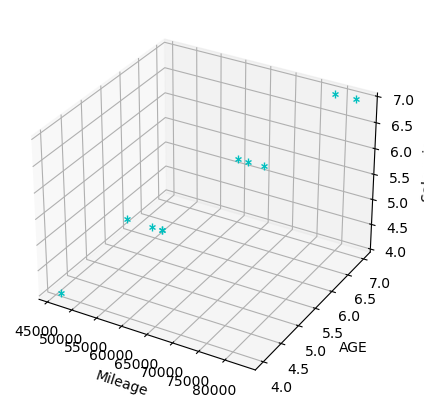

In [29]:
f,ax=plt.subplots(subplot_kw={"projection":"3d"})
f.set_figwidth(5)
f.set_figheight(5)
ax.plot(X['Mileage'],X['Age(yrs)'],pd.DataFrame(y,columns=['Sale_price'])['Sale_price'],'c1',label='actual')
ax.plot(df['Mileage'],df['Age(yrs)'],pd.DataFrame(ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X))).reshape(-1,1),columns=['Sale_price'])['Sale_price'],'c2',label = 'Predict')
plt.xlabel("Mileage")
plt.ylabel("AGE")
ax.set_zlabel("Sale price")
plt.show()

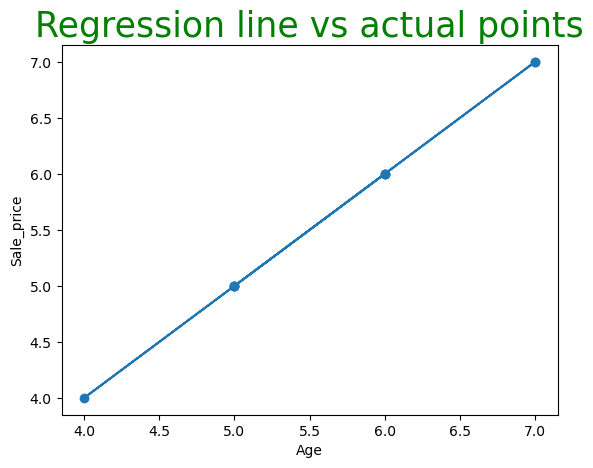

In [30]:
plt.title("Regression line vs actual points",fontsize = 25,color='green')
plt.ylabel("Sale_price")
plt.xlabel("Age")
plt.scatter(X['Age(yrs)'],pd.DataFrame(y,columns=['Sale_price'])['Sale_price'])
plt.plot(X['Age(yrs)'],pd.DataFrame(ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X))),columns=['Sale_price'])['Sale_price'])

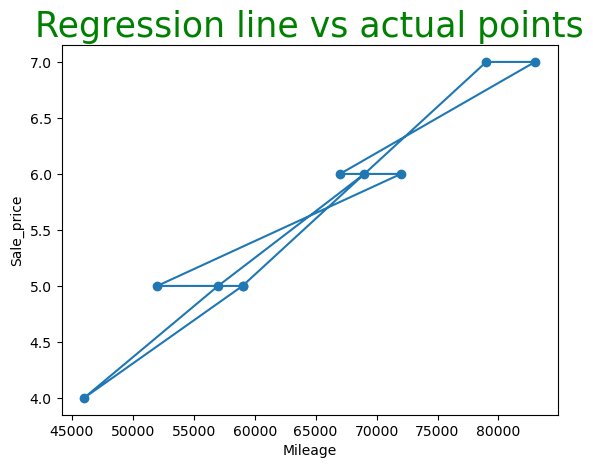

In [31]:
plt.title("Regression line vs actual points",fontsize = 25,color='green')
plt.ylabel("Sale_price")
plt.xlabel("Mileage")
plt.scatter(X['Mileage'],pd.DataFrame(y,columns=['Sale_price'])['Sale_price'])
plt.plot(X['Mileage'],pd.DataFrame(ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X))),columns=['Sale_price'])['Sale_price'])

## Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly = poly.fit_transform(X)

polyreg = LinearRegression()
polyreg.fit(X_poly,y)

LinearRegression()

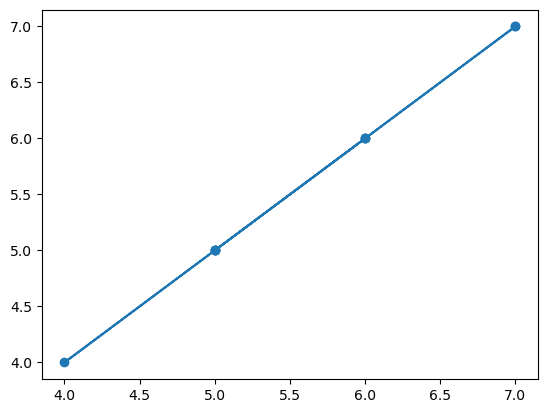

In [33]:
plt.scatter(X['Age(yrs)'],y)
plt.plot(X['Age(yrs)'],polyreg.predict(X_poly))

## Support Vector Machines

In [34]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(ss_x.fit_transform(X),ss_y.fit_transform(y))

C:\Users\joben\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [35]:
svr.predict(ss_x.fit_transform(X))

array([ 0.33664728, -0.55453947, -1.08562381, -0.55476007, -0.64667758,
        0.3366715 ,  0.38435344,  1.42729773,  1.42627389, -0.55488116])

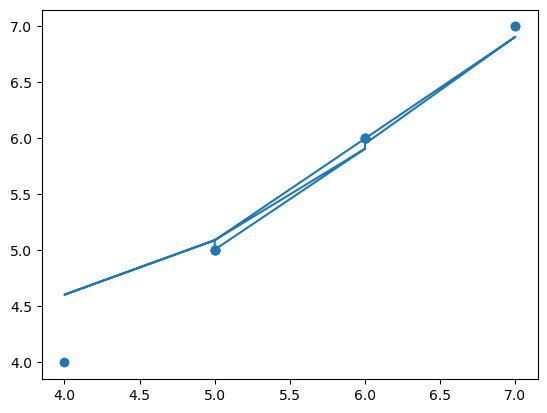

In [36]:
plt.scatter(X['Age(yrs)'],y)
plt.plot(X['Age(yrs)'],ss_y.inverse_transform(svr.predict(ss_x.fit_transform(X)).reshape(-1,1)))

## Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(ss_x.fit_transform(X),ss_y.fit_transform(y))

DecisionTreeRegressor(random_state=0)

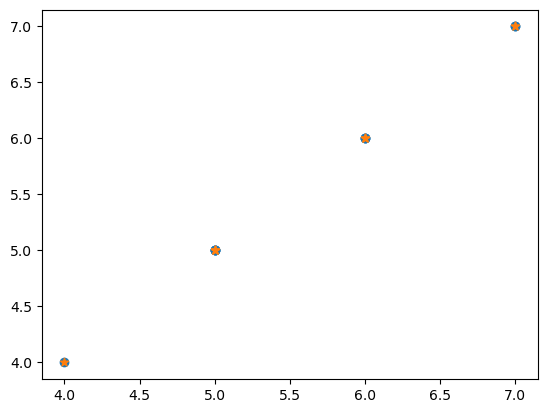

In [38]:
plt.scatter(X['Age(yrs)'],y)
plt.scatter(X['Age(yrs)'],ss_y.inverse_transform(dtr.predict(ss_x.fit_transform(X)).reshape(-1,1)),marker ="*")
#plt.pie(pd.DataFrame(y_test).value_counts)

## Lasso-Ridge Regressor

In [39]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 1)
ridgeR.fit(ss_x.fit_transform(X),ss_y.fit_transform(y))

Ridge(alpha=1)

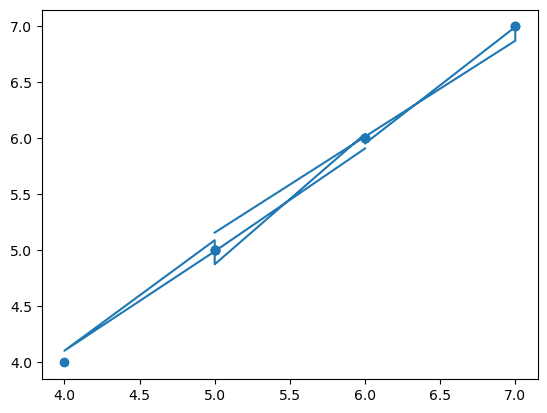

In [40]:
plt.scatter(X['Age(yrs)'],y)
plt.plot(X['Age(yrs)'],ss_y.inverse_transform(ridgeR.predict(ss_x.fit_transform(X)).reshape(-1,1)))